# Image Classification pada Dataset EMNIST

In [10]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Preparasi Dataset

In [11]:
# Baca data training dan test
sample = 2500
train_data = pd.read_csv('/content/drive/MyDrive/Dataset_UTS/emnist-bymerge-train.csv', nrows=sample)
test_data = pd.read_csv('/content/drive/MyDrive/Dataset_UTS/emnist-bymerge-test.csv', nrows=sample)

print("Train data :", train_data.shape)
print("Test data :", test_data.shape)

Train data : (2500, 785)
Test data : (2500, 785)


In [12]:
# Pisahkan Label & Image
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (2500, 784)
Shape of y_train: (2500,)


In [13]:
# Reshape Data

X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)
print("Reshaped X_train:", X_train.shape)

Reshaped X_train: (2500, 28, 28)


## 2. HOG Feature Extraction

In [14]:
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler

def extract_hog_features(images):
    hog_features = []
    for image in images:
        hog_feat = hog(image, orientations=9,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2),
                       block_norm='L2')
        hog_features.append(hog_feat)
    return hog_features

X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

# Standarisasi fitur HOG
scaler = StandardScaler()
X_train_hog = scaler.fit_transform(X_train_hog)
X_test_hog = scaler.transform(X_test_hog)

print("Shape of HOG features (X_train):", len(X_train_hog[0]))

Shape of HOG features (X_train): 144


In [15]:
from sklearn.svm import SVC

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', C=1.0)

# Latih model SVM
svm_model.fit(X_train_hog, y_train)

# Prediksi pada test set
y_pred = svm_model.predict(X_test_hog)

In [16]:
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, f1_score
import numpy as np
from skimage import exposure

# Fungsi untuk mengekstrak fitur HOG
def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Ekstraksi HOG
        features = hog(img.reshape(28, 28),
                       orientations=9,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2),
                       visualize=False,
                       block_norm='L2')
        hog_features.append(features)
    return np.array(hog_features)

# Ekstrak fitur HOG dari X_train
X_train_hog = extract_hog_features(X_train)

# Inisialisasi Leave-One-Out
loo = LeaveOneOut()

# Menyimpan hasil
y_true = []
y_pred = []

# Loop untuk setiap split LOOCV
for train_index, test_index in loo.split(X_train_hog):
    X_train_loo, X_test_loo = X_train_hog[train_index], X_train_hog[test_index]
    y_train_loo, y_test_loo = y_train[train_index], y_train[test_index]

    # Melatih model SVM
    model = SVC(kernel='linear')
    model.fit(X_train_loo, y_train_loo)

    # Melakukan prediksi
    y_pred_loo = model.predict(X_test_loo)

    # Menyimpan hasil
    y_true.append(y_test_loo[0])
    y_pred.append(y_pred_loo[0])

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Menampilkan hasil
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nPrecision:", precision)
print("\nF1 Score:", f1)

Accuracy: 0.7372

Confusion Matrix:
 [[ 80   0   0 ...   0   0   0]
 [  0 145   0 ...   0   0   0]
 [  0   0 131 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0  28   1]
 [  0   2   0 ...   0   1  50]]

Precision: 0.7262950740444989

F1 Score: 0.7205266408270327


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


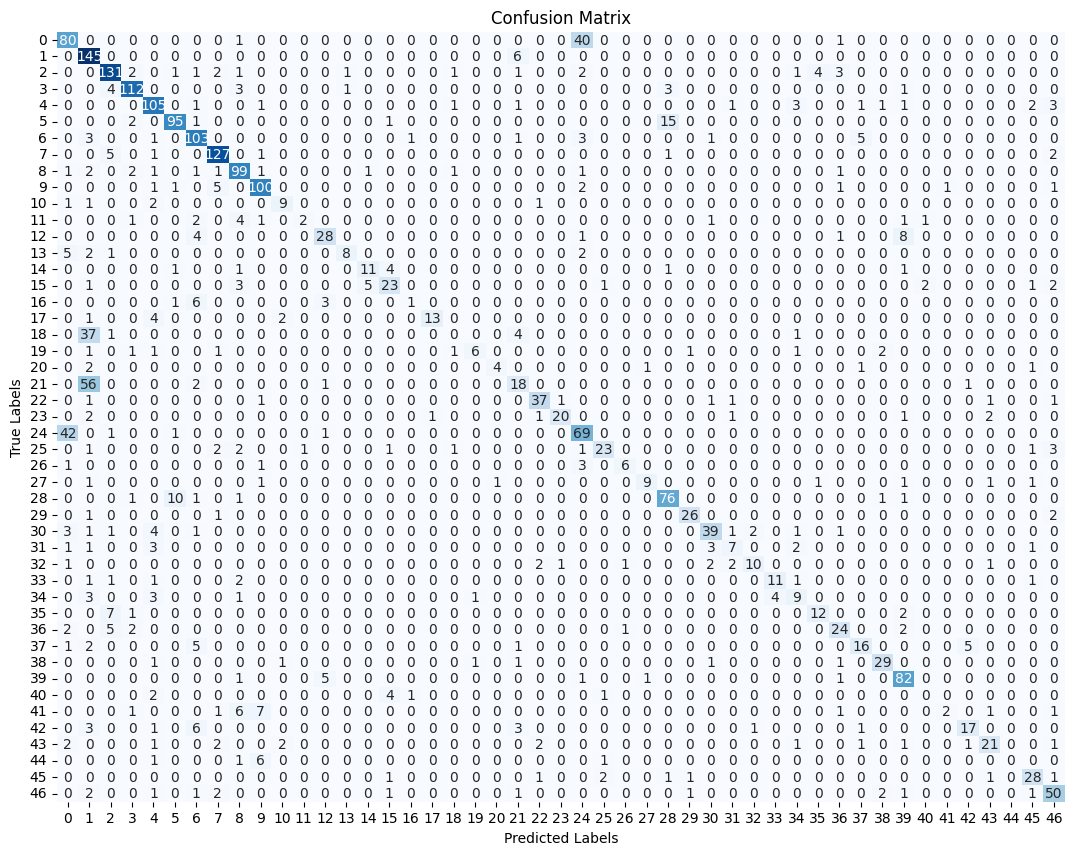

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Membuat plot heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [18]:
label_counts = train_data['24'].value_counts().sort_index()
print(label_counts)

24
0     122
1     151
2     151
3     124
4     121
5     114
6     118
7     137
8     112
9     112
10     14
11     13
12     42
13     18
14     19
15     38
16     11
17     20
18     43
19     15
20      9
21     78
22     44
23     28
24    114
25     36
26     11
27     16
28     91
29     30
30     54
31     18
32     20
33     18
34     21
35     22
36     36
37     30
38     35
39     91
40      8
41     20
42     32
43     35
44      9
45     36
46     63
Name: count, dtype: int64
